# env variable path

In [77]:
os.environ["PATH"] += os.pathsep + 'C:\\Users\\saruk.shaikh\\Downloads\\ffmpeg-20180710-0bd48ab-win64-static\\bin'
os.environ["PATH"]

'E:\\anaconda;E:\\anaconda\\Library\\mingw-w64\\bin;E:\\anaconda\\Library\\usr\\bin;E:\\anaconda\\Library\\bin;E:\\anaconda\\Scripts;E:\\anaconda\\Library\\bin;C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Program Files\\Common Files\\Microsoft Shared\\Microsoft Online Services;C:\\Program Files (x86)\\Common Files\\Microsoft Shared\\Microsoft Online Services;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Program Files\\nodejs\\;C:\\Users\\saruk.shaikh\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\saruk.shaikh\\AppData\\Roaming\\npm;E:\\anaconda\\lib\\site-packages\\llvmlite\\binding;./NODE/conda_env/bin;E:\\anaconda;E:\\anaconda\\Library\\mingw-w64\\bin;E:\\anaconda\\Library\\usr\\bin;E:\\anaconda\\Library\\bin;E:\\anaconda\\Scripts;E:\\anaconda\\Library\\bin;C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Program Files\\Common Files\\Microsoft Shared\\Microsoft Online Services;C:\\Program Files (x86)\\Common Files\\Mi

In [78]:
###############################################################

In [79]:
##################
# Standard imports
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import librosa

import librosa.display

In [80]:
y, sr = librosa.load('E:/saruk.shaikh/avengers.mp3')


# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

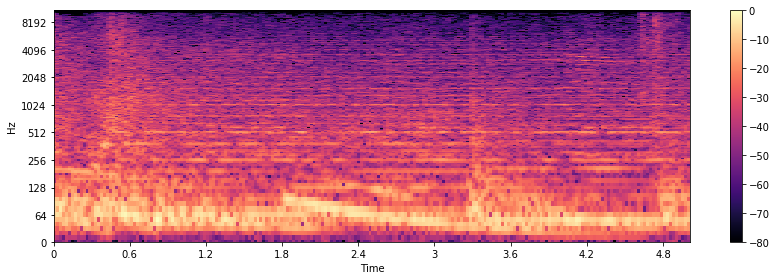

In [81]:
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()


In [82]:
# We'll compare frames using cosine similarity, and aggregate similar frames
# by taking their (per-frequency) median value.
#
# To avoid being biased by local continuity, we constrain similar frames to be
# separated by at least 2 seconds.
#
# This suppresses sparse/non-repetetitive deviations from the average spectrum,
# and works well to discard vocal elements.

S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimium
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)

In [83]:
# We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full

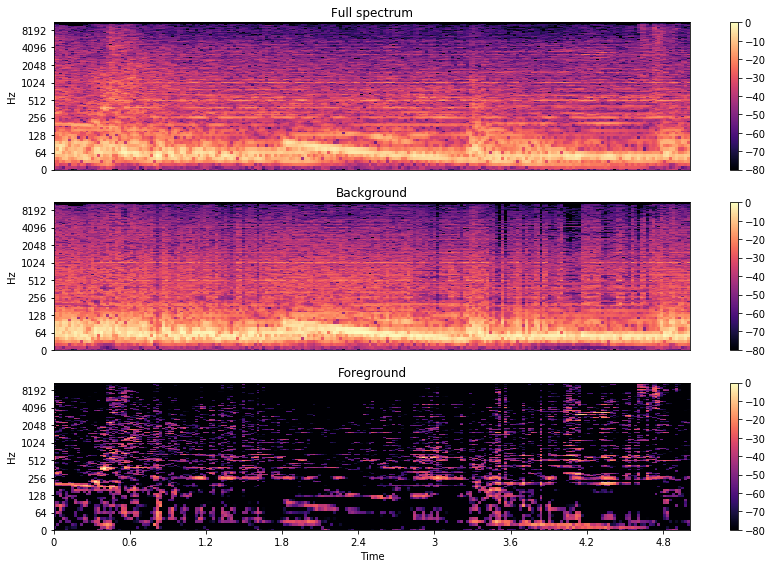

In [84]:
# sphinx_gallery_thumbnail_number = 2

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
########################################################################################

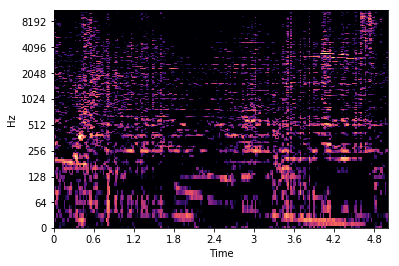

<Figure size 432x288 with 0 Axes>

In [112]:
%matplotlib inline
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),y_axis='log', x_axis='time', sr=sr)
plt.figure()
plt.show()


# Getting array of the image

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0996820e-05
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0974337e-05
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0907153e-05
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0103145e-09
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.2169493e-10
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0139965e-10
  0.0000000e+00 0.0000000e+00]]


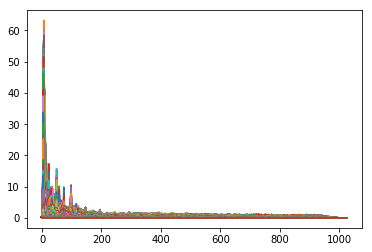

In [119]:
print(S_background)
plt.plot(S_background)
plt.show()

In [ ]:
#############################################################################################################

## Drawing the waveform of the audio

E:\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]
E:\anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


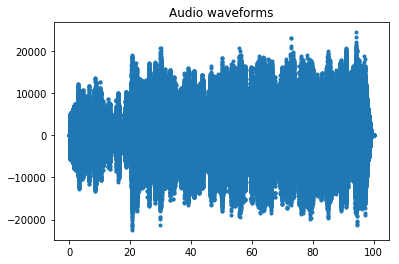

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import wave
import sys

plt.figure(1)

class Audio:
    def __init__(self, audio):
        self.audio = wave.open(audio,'r')
        self.signal = self.audio.readframes(-1)
        self.signal = np.fromstring(self.signal, 'Int16')
        self.fr = self.audio.getframerate()
        self.time = np.linspace(0, 100, num=(len(self.signal)))
        self.fft = np.fft.fft(self.signal)

    def plot(self):
        plt.title("Audio waveforms")
        plt.plot(self.time, self.signal, '.')

gana = Audio('C:\\Users\\saruk.shaikh\\Downloads\\avengers.wav')
#humm = Audio('humm.wav')

gana.plot()
#humm.plot()
plt.show()